In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from ClassActivationMap import ClassActivationMap
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [2]:
# Load model
model = tf.keras.applications.VGG16(weights="imagenet")
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
# Load image
image_path = "./images/cat_08.jpg"
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [4]:
pred = model.predict(x)
print("Prediction:\n{}".format(decode_predictions(pred, top=3)[0]))

Prediction:
[('n02124075', 'Egyptian_cat', 0.7165493), ('n02123045', 'tabby', 0.15574291), ('n02123159', 'tiger_cat', 0.07826325)]


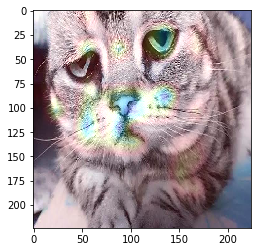

In [5]:
CAM = ClassActivationMap(model, last_conv_layer_name="block5_conv3", target_class_index=281)  # 281 : tabby
CAM.visualize(x, original_img=cv2.cvtColor(image.img_to_array(img), cv2.COLOR_BGR2RGB))